# Creating Eigenmaps of $H_n$.
We hope to show convergence between the uniform weighting case of $H_n$ and the poisson weighting case of $H_n$.

In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from fractal_functions import *

In [2]:
def hanoi_flower(n, num_petals, save_path):
    """
    Plots the 2D Laplacian eigenmap of the Hanoi graph (at level n)
    for both deterministic and random weights, arranged like a flower
    with `num_petals` random realizations (deterministic is always the same).
    """
    tol = 1e-10  # Tolerance to filter out zero eigenvalue

    # Create base Hanoi graph
    hn = hanoi_t(n)
    node_order = list(hn.nodes())

    # Start plotting
    plt.figure(figsize=(12, 12))

    for i in range(num_petals):

        # Compute deterministic embedding
        hd = add_deterministic_weights(hn.copy(), n)
        L_det = nx.laplacian_matrix(hd, nodelist=node_order, weight='weight')        
        coords_det = get_eigenmap_optimized(L_det)

        # plot the det embedding
        plt.scatter(coords_det[:, 0], coords_det[:, 1], c='blue', label='Deterministic Weights' if i == 0 else None, alpha=0.25, s=5)    


        # compute and plot each random realization
        hr = add_random_weights(hn.copy(), n)
        L_rand = nx.laplacian_matrix(hr, nodelist=node_order, weight='weight')
        
        coords_rand = get_eigenmap_optimized(L_rand)

        # Plot random result
        plt.scatter(coords_rand[:, 0], coords_rand[:, 1], c='red', alpha=0.25, s=5,
                    label='Random Weights' if i == 0 else None)  # Only label once

    # Finish plot
    plt.title(f"Laplacian Eigenmap Flower for the Hanoi Graph (n={n}, petals={num_petals})")
    plt.xlabel(r"${v}_1$")
    plt.ylabel(r"${v}_2$")
    plt.axis('equal')
    # plt.grid(True)
    plt.legend()
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()


/home/dtywick/OneDrive/Coding/FractalsREU/LaplacianEigenmaps_on_SG/fractal_functions.py:628: UserWarning: Exited postprocessing with accuracies 
[6.96647599e-09 2.09008372e-08 1.09568995e-07]
not reaching the requested tolerance 1e-07.
  _, Evecs = lobpcg(L, X, M=M, largest=False, tol=1e-7, maxiter=100)


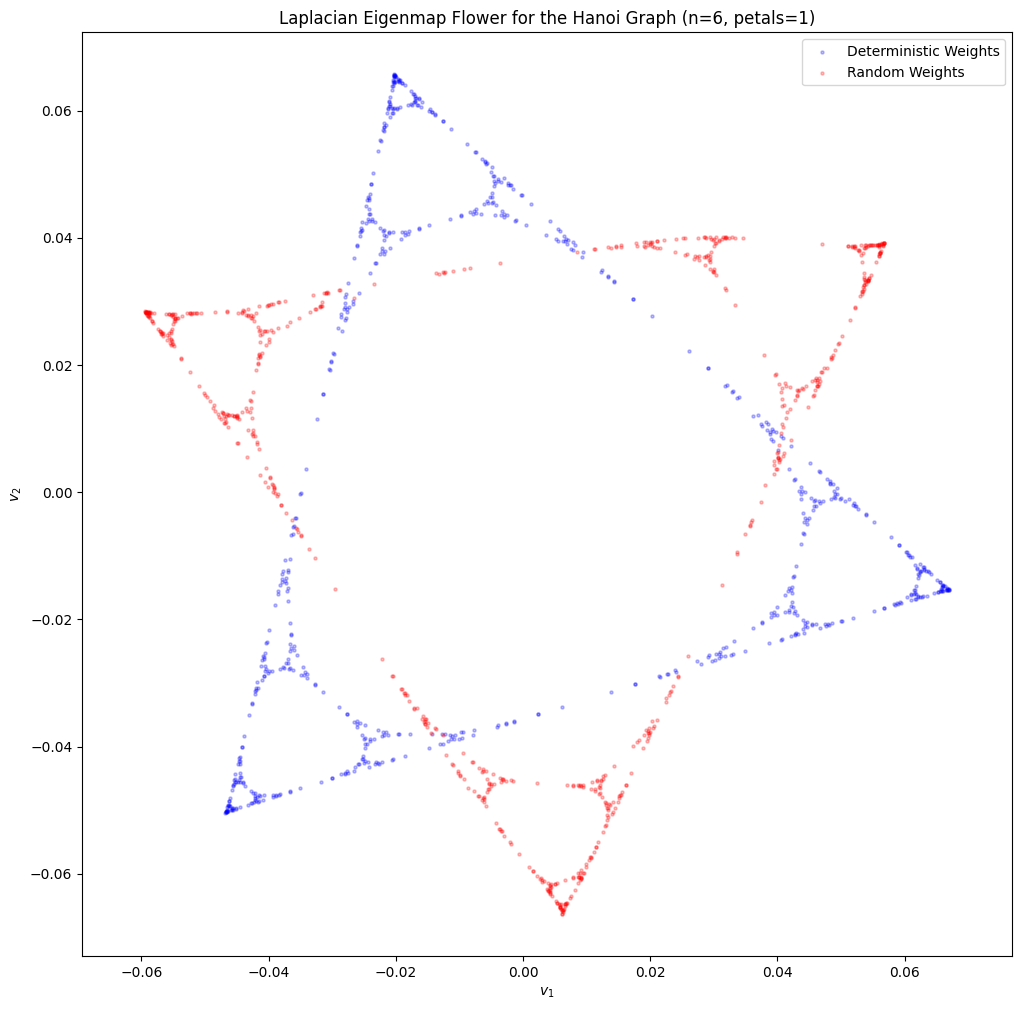

In [3]:
n = 6; num_petals = 1
pth = ''
# pth = f'/home/tywick/OneDrive/UConn/Coding/Sage_Notebooks/newplots/HanoiFlower_n{n}_p{num_petals}'
hanoi_flower(n=n, num_petals = num_petals, save_path = '')

Let $(\mathbf{\xi}_1, \mathbf{\xi}_2)$ be the two dimensional eigenmap for the deterministic case, and $(\mathbf{\eta}_1, \mathbf{\eta}_2)$ is the random case. We aim to find the norm of the difference of the maps as $n \to \infty$. But first, we need to enforce a canonical rotation.

In [6]:
# modified plotting function to display the rotation logic
def hanoi_flower_with_axes(n, num_petals, save_path=None):
    """
    Plots Laplacian eigenmaps and overlays the principal axis (line connecting
    the two most distant hull points) for visual verification.
    """
    tol = 1e-10
    k = 3

    hn = hanoi_t(n)
    node_order = list(hn.nodes())

    plt.figure(figsize=(12, 12))   



    # --- Compute and Plot Cases ---
    for i in range(num_petals):

         # --- Compute and Plot Deterministic Case ---
        hd = add_deterministic_weights(hn.copy(), n)
        L_det = nx.laplacian_matrix(hd, nodelist=node_order, weight='weight')
        coords_det = get_eigenmap_optimized(L_det)
        
        # Plot the deterministic embedding
        plt.scatter(coords_det[:, 0], coords_det[:, 1], s=5, alpha=0.25,
                    c='blue', label='Deterministic Weights' if i == 0 else None)
        
        # Find and plot its principal axis using convex hull algorithm
        p1_det, p2_det = find_principal_axis(coords_det)

        plt.plot([p1_det[0], p2_det[0]], [p1_det[1], p2_det[1]], 
                color='cyan', linewidth=3, linestyle='-', label='Deterministic Axis' if i == 0 else None)

        plt.scatter([p1_det[0], p2_det[0]], [p1_det[1], p2_det[1]], 
                    c='cyan', s=100, edgecolor='black', zorder=10)


        # Do the same for the random embedding
        hr = add_random_weights(hn.copy(), n)
        L_rand = nx.laplacian_matrix(hr, nodelist=node_order, weight='weight')
        coords_rand = get_eigenmap_optimized(L_rand)
        # Plot the random embedding
        plt.scatter(coords_rand[:, 0], coords_rand[:, 1], 
                    c='red', s=5, alpha=0.25,
                    label='Random Weights' if i == 0 else None)
        
        # Find and plot its principal axis
        p1_rand, p2_rand = find_principal_axis(coords_rand)
        plt.plot([p1_rand[0], p2_rand[0]], [p1_rand[1], p2_rand[1]], 
                 color='black', linewidth=3, linestyle='--', label='Random Axis' if i == 0 else None)
        plt.scatter([p1_rand[0], p2_rand[0]], [p1_rand[1], p2_rand[1]], 
                    c='black', s=100, edgecolor='black', zorder=10)


    # --- Final Plotting ---
    plt.title(f"Laplacian Eigenmaps with Principal Axes (n={n}, petals={num_petals})")
    plt.xlabel(r"${v}_1$")
    plt.ylabel(r"${v}_2$")
    plt.axis('equal')
    plt.legend(markerscale=2)
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()   


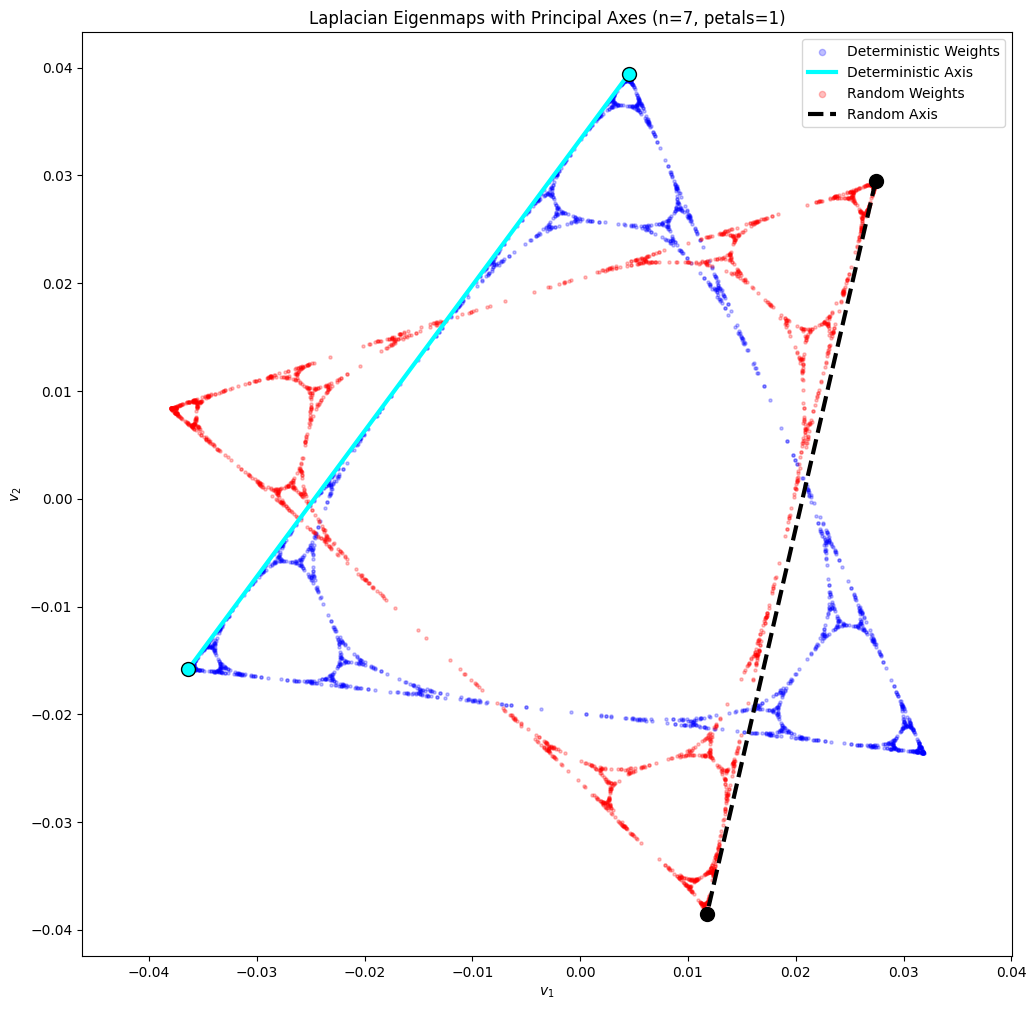

In [7]:
hanoi_flower_with_axes(7, 1)

In [8]:
# using this axis, align the eigenmaps
def hanoi_flower_aligned(n, num_petals, save_path=None):
    """
    Computes Laplacian eigenmaps and rotates them so principal axes are horizontal.
    """
    tol = 1e-10
    k = 3
    hn = hanoi_t(n)
    node_order = list(hn.nodes())
    plt.figure(figsize=(12, 12))
    
    for i in range(num_petals):
        # --- Deterministic Case ---
        hd = add_deterministic_weights(hn.copy(), n)
        L_det = nx.laplacian_matrix(hd, nodelist=node_order, weight='weight')
        _, Evecs_det = eigsh(L_det, k=k, which='SM')
        coords_det_raw = Evecs_det[:, 1:3]
        
        # Align to x-axis
        coords_det_aligned, axis_points_det = align_to_x_axis(coords_det_raw)
        
        plt.scatter(coords_det_aligned[:, 0], coords_det_aligned[:, 1],
                   c='blue', label='Deterministic Weights' if i == 0 else None,
                   alpha=0.4, s=20)
        
        # --- Random Case ---
        hr = add_random_weights(hn.copy(), n)
        L_rand = nx.laplacian_matrix(hr, nodelist=node_order, weight='weight')
        _, Evecs_rand = eigsh(L_rand, k=k, which='SM')
        coords_rand_raw = Evecs_rand[:, 1:3]
        
        # Align to x-axis
        coords_rand_aligned, axis_points_rand = align_to_x_axis(coords_rand_raw)
        
        plt.scatter(coords_rand_aligned[:, 0], coords_rand_aligned[:, 1],
                   c='red', alpha=0.4, s=20,
                   label='Random Weights' if i == 0 else None)

    
    plt.title(f"X-Axis Aligned Eigenmaps (n={n}, petals={num_petals})")
    plt.xlabel(r"Aligned $v_1$")
    plt.ylabel(r"Aligned $v_2$")
    plt.axis('equal')
    plt.legend(markerscale=2)
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()

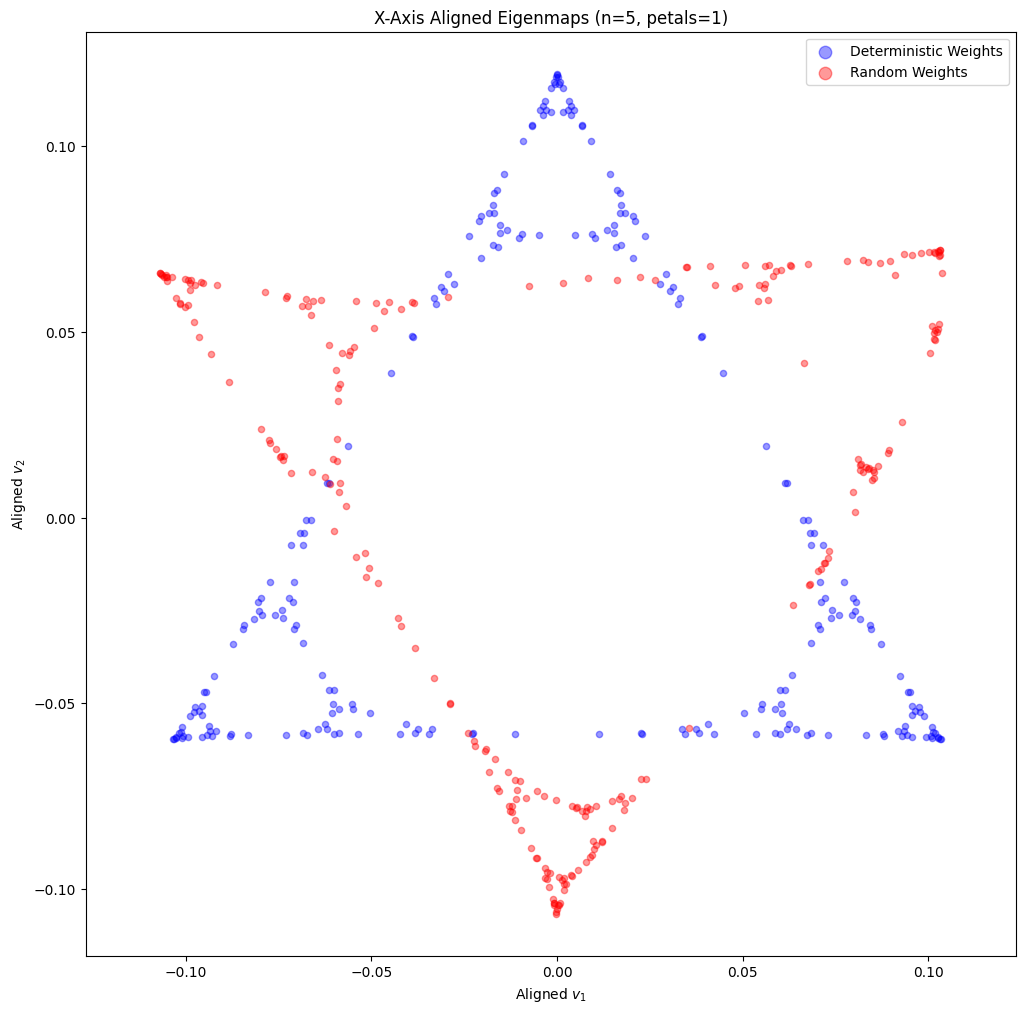

In [12]:
# half the time we get the incorrect result, a rotation of 180 from what we want
hanoi_flower_aligned(5, 1, save_path='')

The previous method fails a small percentage of the time. Instead, we use the orthogonal procrustes problem (see scipy documentation) to find and apply some rotation matrix $R$ that minimizes $||A - RB||_F$, where $A$ and $B$ are the deterministic and random eigenmaps, and the norm is the frobenious norm. 

In [4]:
# --- RUN THE EXPERIMENT ---
N = 12
n_data, error_data = run_convergence_experiment(N)

n     | Frobenius Error      | Time (s)  
----------------------------------------
1     | 0.165398             | 0.00      
2     | 0.457599             | 0.01      
3     | 0.266231             | 0.12      


/home/dtywick/OneDrive/Coding/FractalsREU/LaplacianEigenmaps_on_SG/fractal_functions.py:630: UserWarning: The problem size 6 minus the constraints size 0 is too small relative to the block size 3. Using a dense eigensolver instead of LOBPCG iterations.No output of the history of the iterations.
  _, Evecs = lobpcg(L, X, M=M, largest=False, tol=1e-7, maxiter=100)
/home/dtywick/OneDrive/Coding/FractalsREU/LaplacianEigenmaps_on_SG/fractal_functions.py:630: UserWarning: The problem size 12 minus the constraints size 0 is too small relative to the block size 3. Using a dense eigensolver instead of LOBPCG iterations.No output of the history of the iterations.
  _, Evecs = lobpcg(L, X, M=M, largest=False, tol=1e-7, maxiter=100)
/home/dtywick/randSG/lib/python3.13/site-packages/pyamg/krylov/_gmres_householder.py:148: UserWarning: Setting maxiter to maximum allowed, n.
  warn('Setting maxiter to maximum allowed, n.')
/home/dtywick/randSG/lib/python3.13/site-packages/pyamg/krylov/_gmres_househol

4     | 0.174168             | 0.17      
5     | 0.135061             | 0.25      


/home/dtywick/OneDrive/Coding/FractalsREU/LaplacianEigenmaps_on_SG/fractal_functions.py:630: UserWarning: Exited at iteration 7 with accuracies 
[1.45847425e-08 1.61315586e-07 2.78238652e-08]
not reaching the requested tolerance 1e-07.
Use iteration 7 instead with accuracy 
6.790806465736492e-08.

  _, Evecs = lobpcg(L, X, M=M, largest=False, tol=1e-7, maxiter=100)
/home/dtywick/OneDrive/Coding/FractalsREU/LaplacianEigenmaps_on_SG/fractal_functions.py:630: UserWarning: Exited postprocessing with accuracies 
[1.45847429e-08 2.26909864e-08 1.62117257e-07]
not reaching the requested tolerance 1e-07.
  _, Evecs = lobpcg(L, X, M=M, largest=False, tol=1e-7, maxiter=100)


6     | 0.089980             | 0.36      
7     | 0.046884             | 0.77      
8     | 0.028736             | 1.51      
9     | 0.033073             | 10.26     
10    | 0.011931             | 29.19     
11    | 0.005573             | 86.51     
12    | 0.004846             | 301.62    


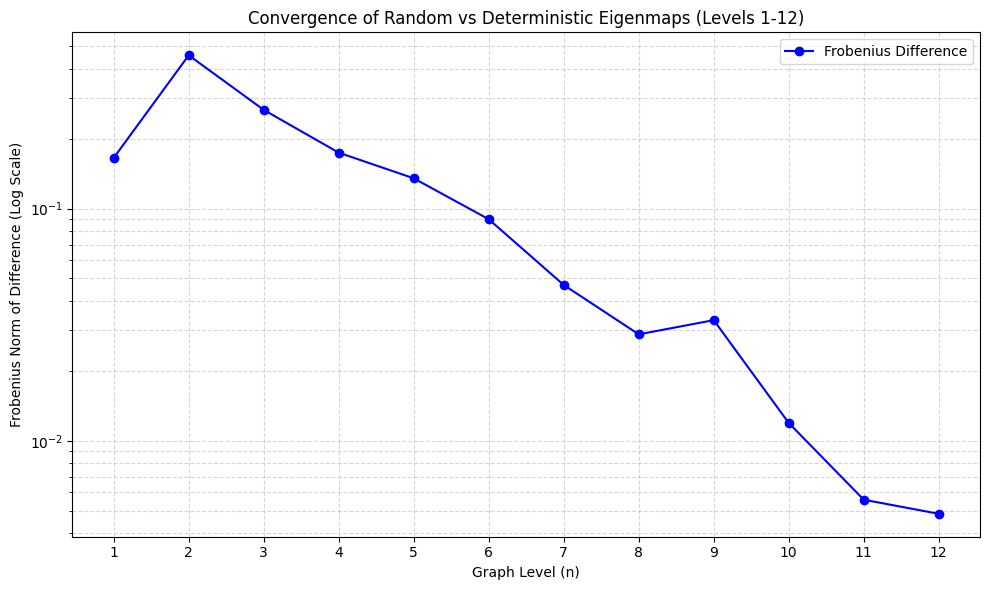

In [6]:
# --- PLOT THE RESULTS (LOG SCALE) ---
plt.figure(figsize=(10, 6))
plt.plot(n_data, error_data, marker='o', linestyle='-', color='b', label='Frobenius Difference')

# Set the y-axis to logarithmic scale
plt.yscale('log')

plt.title(f'Convergence of Random vs Deterministic Eigenmaps (Levels 1-{N})')
plt.xlabel('Graph Level (n)')
plt.ylabel('Frobenius Norm of Difference (Log Scale)')

# Enable grid for both major and minor ticks (helpful for reading log plots)
plt.grid(True, which="both", ls="--", alpha=0.5)

plt.xticks(n_data)  # Ensure integer ticks for n
plt.legend()

plt.tight_layout()
plt.show()